# Proyek Recommendation System : Movie Recommendation-Content Based Filtering


*   Nama : Paramita Citra Indah Mulia
*   Email : paramitamulia@gmail.com





# Import Library yang Dibutuhkan

In [155]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Data Understanding

In [2]:
# Upload API Files from Kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"paramitacim","key":"9489966c8c3eb07ee70ccc7d459c7f9e"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d tmdb/tmdb-movie-metadata

100% 8.89M/8.89M [00:00<00:00, 92.0MB/s]
100% 8.89M/8.89M [00:00<00:00, 91.6MB/s]


In [5]:
!unzip tmdb-movie-metadata.zip

Archive:  tmdb-movie-metadata.zip
  inflating: tmdb_5000_credits.csv   
  inflating: tmdb_5000_movies.csv    


In [182]:
df = pd.read_csv('/content/tmdb_5000_movies.csv')

In [183]:
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

* budget - biaya produksi film
* genre - genre film : Action, Comedy, Thriller, dll.
* homepage - link film
* id - id film
* keywords - Kata kunci atau tag yang terkait dengan film.
* original_language - Bahasa pembuatan film.
* original_title - Judul film sebelum diterjemahkan atau diadaptasi.
* overview - Deskripsi singkat film.
* popularity - Kuantitas numerik yang menentukan popularitas film.
* production_companies - Rumah produksi film.
* production_countries - Negara tempat film diproduksi.
* release_date - tanggal rilis.
* revenue - penghasilan dari film
* runtime - durasi film
* spoken_language - bahasa dalam film
* status - "Released" atau "Rumored".
* tagline - tagline film
* title - judul film
* ote_average - rating rata-rata
* vote_count - jumlah vote

# Univariate EDA

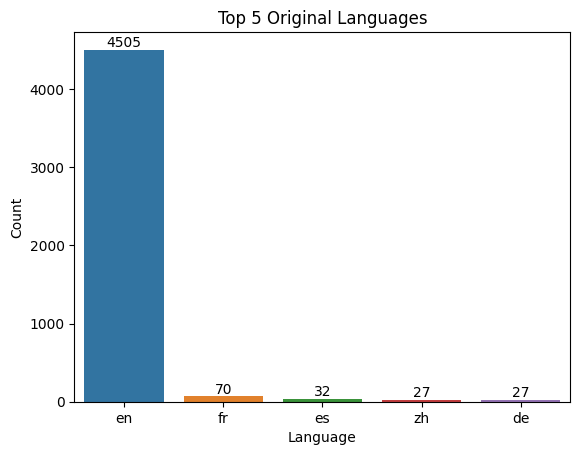

In [185]:
language_counts = df['original_language'].value_counts()

# Mengambil 5 nilai tertinggi
top_languages = language_counts.head(5)

# Membuat bar plot
ax = sns.barplot(x=top_languages.index, y=top_languages.values)
plt.title('Top 5 Original Languages')
plt.ylabel('Count')
plt.xlabel('Language')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

Dari 4803 data, sebanyak 4505 film menggunakan Bahasa Inggris.

In [186]:
genre = df['genres'].value_counts()
genre

[{"id": 18, "name": "Drama"}]                                                                                                            370
[{"id": 35, "name": "Comedy"}]                                                                                                           282
[{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]                                                                          164
[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]                                                                         144
[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]                                                                              142
                                                                                                                                        ... 
[{"id": 12, "name": "Adventure"}, {"id": 28, "name": "Action"}, {"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]            1
[{"id": 28, "

Genre film terbanyak pada dataset ini adalah drama, komedi, drama-romance, comedy-romance, dan comedy-drama.

In [187]:
df['production_countries'].value_counts()

[{"iso_3166_1": "US", "name": "United States of America"}]                                                                                                                                     2977
[{"iso_3166_1": "GB", "name": "United Kingdom"}, {"iso_3166_1": "US", "name": "United States of America"}]                                                                                      181
[]                                                                                                                                                                                              174
[{"iso_3166_1": "GB", "name": "United Kingdom"}]                                                                                                                                                131
[{"iso_3166_1": "DE", "name": "Germany"}, {"iso_3166_1": "US", "name": "United States of America"}]                                                                                             119
                    

Dari keseluruhan data, sebanyak 2977 film diproduksi oleh United States of America.

In [188]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


* Budget terbesar untuk pembuatan film pada dataset ini adalah 380 juta dolar
* Penghasilan terbesar dari film sebesar 2.7 miliar dolar
* Durasi film terpanjang yaitu 338 menit

# Data Preparation

In [189]:
#membuat dataframe baru
df2 = df[['id', 'title', 'genres']]
df2.head()

,id,title,genres
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


In [190]:
import ast

def extract_names(row):
    # Mengubah string menjadi list of dictionaries
    row_list = ast.literal_eval(row)

    # Mengambil nilai "name" dari setiap dictionary dan mengubahnya menjadi lowercase
    names = [item['name'].lower() for item in row_list]

    # Menggabungkan semua nama dengan "-"
    return '-'.join(names)

# Menggunakan fungsi apply untuk mengubah kolom
df2['genres'] = df2['genres'].apply(extract_names)

<ipython-input-190-e8464f4c9ccb>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['genres'] = df2['genres'].apply(extract_names)


In [191]:
df2.head(3)

,id,title,genres
0,19995,Avatar,action-adventure-fantasy-science fiction
1,285,Pirates of the Caribbean: At World's End,adventure-fantasy-action
2,206647,Spectre,action-adventure-crime


In [192]:
df2['id'].duplicated().sum()

0

tidak ada duplikasi data

In [193]:
df2.isnull().sum()

id        0
title     0
genres    0
dtype: int64

tidak ada missing value

**Pembobotan Kata**

In [194]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data cuisine
tf.fit(df2['genres'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'comedy', 'crime',
       'documentary', 'drama', 'family', 'fantasy', 'fiction', 'foreign',
       'history', 'horror', 'movie', 'music', 'mystery', 'romance',
       'science', 'thriller', 'tv', 'war', 'western'], dtype=object)

In [195]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(df2['genres'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(4803, 22)

Nilai 4800 merupakan ukuran data dan 22 merupakan matrik  genres.

In [196]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.35811618, 0.41401232, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.48052036, 0.55552181, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.51323307, 0.59334045, 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.66373513, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

**Cosine Similarity**

menghitung derajat kesamaan (similarity degree) antar film dengan teknik cosine similarity

In [197]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.74526744, 0.42944732, ..., 0.        , 0.        ,
        0.        ],
       [0.74526744, 1.        , 0.5762325 , ..., 0.        , 0.        ,
        0.        ],
       [0.42944732, 0.5762325 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [200]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa title
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['title'], columns=df['title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap film
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (4803, 4803)


title,Herbie Fully Loaded,"Bright Lights, Big City",Death to Smoochy,Diner,Twister
title,,,,,
Ant-Man,0.209272,0.000000,0.000000,0.000000,0.574570
Twilight,0.762923,0.318288,0.120329,0.207233,0.486848
Zoolander,0.314989,0.000000,0.440710,0.759003,0.000000
The Alamo,0.000000,0.000000,0.000000,0.000000,0.000000
Masked and Anonymous,0.000000,0.378293,0.143013,0.246301,0.160530
Enter the Dangerous Mind,0.000000,0.000000,0.506231,0.000000,0.000000
Beerfest,0.314989,0.000000,0.440710,0.759003,0.000000
Soldier,0.000000,0.000000,0.000000,0.000000,0.210629
Harold & Kumar Go to White Castle,0.537932,0.000000,0.258060,0.444438,0.555155


Kesamaan terbesar ada pada Twilight dan Herbie Fully Loaded dengan nilai 0.76

**Mendapatkan Rekomendasi**

In [201]:
def recommendations(title, similarity_data=cosine_sim_df, items=df[['title', 'genres']], k=5):
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,title].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop title film agar judul film yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

**Rekomendasi Film Mirip The Avengers**

In [202]:
df2[df2.title.eq('The Avengers')]

,id,title,genres
16,24428,The Avengers,science fiction-action-adventure


In [203]:
# Mendapatkan rekomendasi restoran yang mirip dengan KFC
recommendations('The Avengers')

,title,genres
0,The Hunger Games: Catching Fire,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""..."
1,Ant-Man,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""..."
2,Independence Day: Resurgence,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,Captain America: The First Avenger,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
4,Star Trek Into Darkness,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


Dari hasil rekomendasi di atas, diketahui bahwa The Avengers termasuk ke dalam kategori science fiction-action-adventure. Dari 5 item yang direkomendasikan, 5 item memiliki kategori yang sama. Artinya, precision sistem sebesar 5/5 atau 100%.